In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve

%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_5examples = [viridis(0.0)[0:3],viridis(0.3)[0:3],viridis(0.55)[0:3],viridis(0.75)[0:3],viridis(0.95)[0:3]]
alpha_value=0.45
marker_sizer=2.5
dt_vis=30


h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

In [3]:
D_vis_vect=[0]

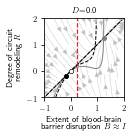

In [4]:
params=load_default_parameters('rate')

params['k_IB']=0.3

locals().update(params)

B_max = 2
R_max = 2
B_min = -1
R_min = -1

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]


    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,B_min,B_max,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
    
    ax0.contour(B,R,U,levels=[0.],colors='gray',linewidths=1.0)
    ax0.contour(B,R,V,levels=[0.],colors='gray',linewidths=1.0)
    
    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)
    

    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

params['k_IB']=0.1 # resetting original value
    
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.,0.])
    
    ax0.contour(B,R,U,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')
    ax0.contour(B,R,V,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')

ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('./Figures/Supplementary/Fig_S6A.pdf')      

In [5]:
FP_kIBalt=FP

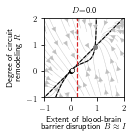

In [6]:
params=load_default_parameters('rate')

params['k_IB']=0.3
params['K_SB']=0.68

locals().update(params)

B_max = 2
R_max = 2
B_min = -1
R_min = -1

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]


    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,B_min,B_max,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
    
    ax0.contour(B,R,U,levels=[0.],colors='gray',linewidths=1.0)
    ax0.contour(B,R,V,levels=[0.],colors='gray',linewidths=1.0)
    
    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)
    

    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

params['k_IB']=0.1 # resetting original values
params['K_SB']=0.875 # resetting original values
    
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.,0.])
    
    ax0.contour(B,R,U,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')
    ax0.contour(B,R,V,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')

ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('./Figures/Supplementary/Fig_S6B.pdf')      

In [7]:
FP_kIBalt_KsbAdjust=FP

In [8]:
params=load_default_parameters('rate')

locals().update(params)

B_max = 2
R_max = 2
B_min = -1
R_min = -1

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]


    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 
               
    FP=fixedpointsfinder(fun_dbdt,B_min,B_max,100000) # Here we will check for steady states on given interval with given discritization step      

In [9]:
FP_orig=FP

In [10]:
FP_B_orig=[FP_orig[0][0],FP_orig[1][0],FP_orig[2][0]]
FP_B_orig

[2.0000000000131024e-05, 0.028850000000000042, 0.91571]

In [11]:
FP_B_alt=[FP_kIBalt[0][0],FP_kIBalt[1][0],FP_kIBalt[2][0]]
FP_B_alt

[-0.19350999999999996, -9.99999999995449e-06, 1.2404000000000002]

In [12]:
FP_B_adj=[FP_kIBalt_KsbAdjust[0][0],FP_kIBalt_KsbAdjust[1][0],FP_kIBalt_KsbAdjust[2][0]]
FP_B_adj

[2.0000000000131024e-05, 0.02971999999999997, 0.9146000000000001]

In [13]:
FP_B_array=[[FP_orig[0][0],FP_orig[1][0],FP_orig[2][0]],[FP_kIBalt[0][0],FP_kIBalt[1][0],FP_kIBalt[2][0]],[FP_kIBalt_KsbAdjust[0][0],FP_kIBalt_KsbAdjust[1][0],FP_kIBalt_KsbAdjust[2][0]]]
FP_B_array

[[2.0000000000131024e-05, 0.028850000000000042, 0.91571],
 [-0.19350999999999996, -9.99999999995449e-06, 1.2404000000000002],
 [2.0000000000131024e-05, 0.02971999999999997, 0.9146000000000001]]

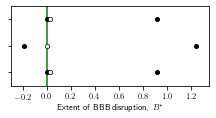

In [14]:
mrksize = 10

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)

plt.plot([0,0],[0.5,3.5],'-',color='green')

for ii in range(3):
    plt.plot(FP_B_array[ii][0],3-ii, 'o',color='black', markersize=mrksize/marker_sizer)
    
    plt.plot(FP_B_array[ii][1],3-ii, 'o',color='black', markersize=mrksize/marker_sizer)
    plt.plot(FP_B_array[ii][1],3-ii, 'o',color='white', markersize=mrksize/marker_sizer*0.66)
    
    plt.plot(FP_B_array[ii][2],3-ii, 'o',color='black', markersize=mrksize/marker_sizer)
    

plt.ylim([0.5,3.5])
plt.xlim([-0.3,1.35])  

plt.xticks([-0.2,0,0.2,0.4,0.6,0.8,1,1.2]) 
plt.yticks([1,2,3],['','',''])  

plt.xlabel(r'Extent of BBB disruption, $B^*$')

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(2.5*w,1.0*w)
fig.savefig('./Figures/Supplementary/Fig_S6C.pdf') 